# Gateway Data Science

## Worksheet 2

## Name:

* Download data here https://www.kaggle.com/mirichoi0218/insurance
* Set up environment: will need `pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodel`, and `sklearn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

1. Assign data to dataframe `df`

In [2]:
df = pd.read_csv('./insurance.csv')

We want to model charges vs age.

2a. Get a histogram of `charges`, a histogram of `bmi`, and a scatter plot of `charges` vs `age` in a single figure using

`fig, axes = plt.subplots(1, 3, figsize=(15, 4))`

followed by seaborn commands.

2b. Use seaborn `hue` option to explore whether `sex`, `region`, or `smoker` separates the data for `charges` vs `age`

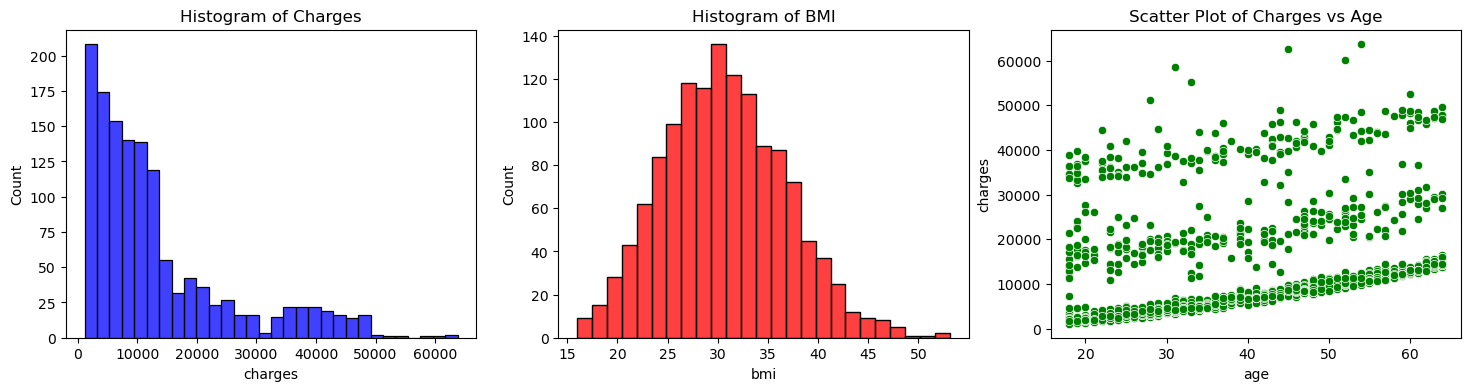

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(df['charges'], ax=axes[0],color='blue')
axes[0].set_title('Histogram of Charges')
sns.histplot(df['bmi'], ax=axes[1], color='red')
axes[1].set_title('Histogram of BMI')
sns.scatterplot(x='age', y='charges', data=df, ax=axes[2], color='green')
axes[2].set_title('Scatter Plot of Charges vs Age')
plt.show()



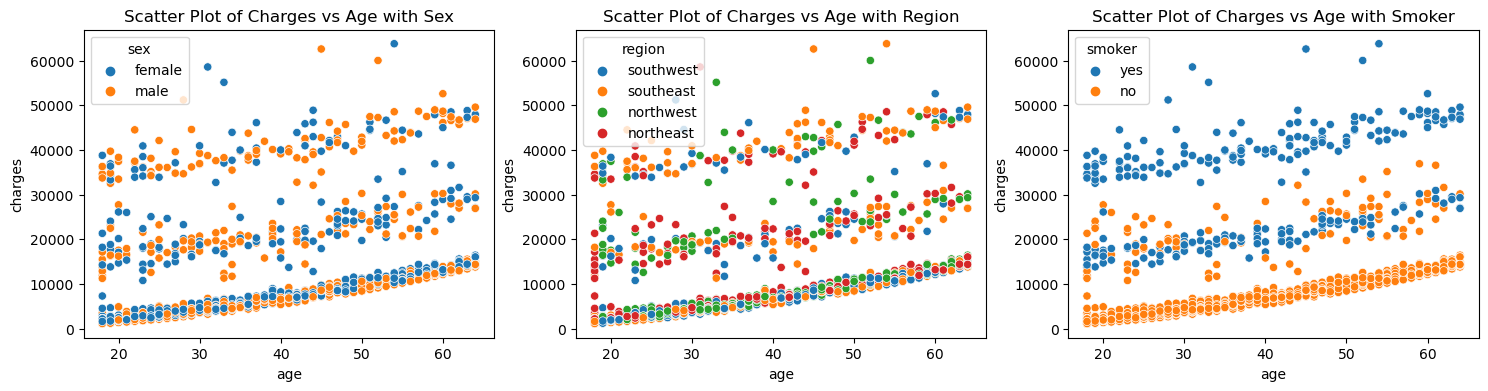

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.scatterplot(x='age', y='charges', data=df, ax=axes[0], hue='sex')
axes[0].set_title('Scatter Plot of Charges vs Age with Sex')
sns.scatterplot(x='age', y='charges', data=df, ax=axes[1], hue='region')
axes[1].set_title('Scatter Plot of Charges vs Age with Region')
sns.scatterplot(x='age', y='charges', data=df, ax=axes[2], hue='smoker')
axes[2].set_title('Scatter Plot of Charges vs Age with Smoker')
plt.show()

3. Filter dataframe by nonsmokers and assign to dataframe `df1`.

In [5]:
df1 = df.loc[df.smoker == "no"]

4. Perform linear regression model of `charges` vs `age` for nonsmokers.  Graph the model over the scatter plot of the data.  Evaluate the `score` for the model.

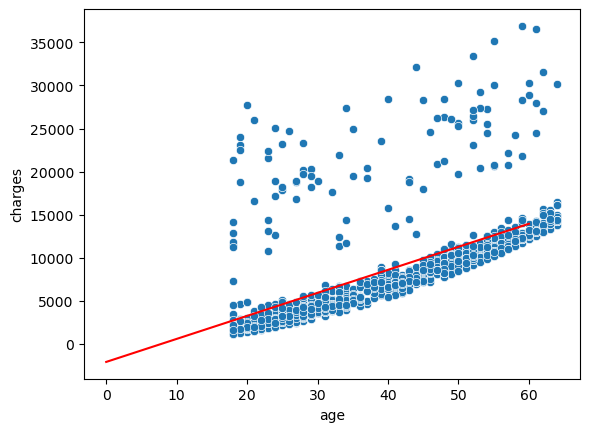

0.3943171632425906


In [6]:
x = np.array(df1['age']).reshape(-1,1)
y = np.array(df1['charges']).reshape(-1,1)
model = LinearRegression().fit(x, y)
x_pred = np.linspace(0, 60, num=20).reshape((-1,1))
y_pred = model.predict(x_pred)
sns.scatterplot(x='age', y='charges', data=df1)
plt.plot(x_pred, y_pred, color="red")
plt.show()
print(model.score(x,y))

4b. Use `sklearn.model_selection import train_test_split` to split the data into training (70%) and test (30%) sets (see TV-ad-data.ipynb)

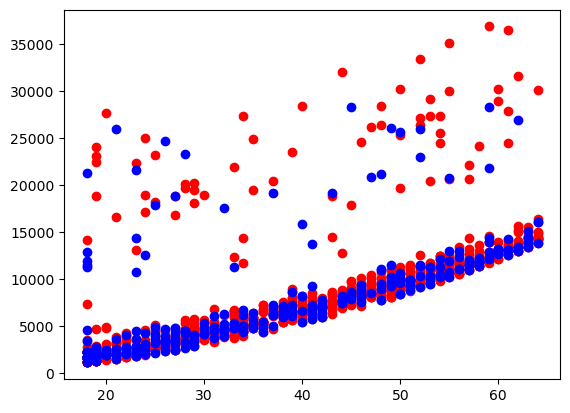

0.3876197708565
0.40625802003622014


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
plt.scatter(x_train, y_train, color="red")
plt.scatter(x_test, y_test, color="blue")
plt.show()
model = LinearRegression().fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

5. Filter dataframe by smokers and assign to dataframe `df2`.

In [10]:
df2 = df.loc[df.smoker == "yes"]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


6. Get a scatter plot of `charges` vs `age` from `df2`, use `hue = 'bmi'`

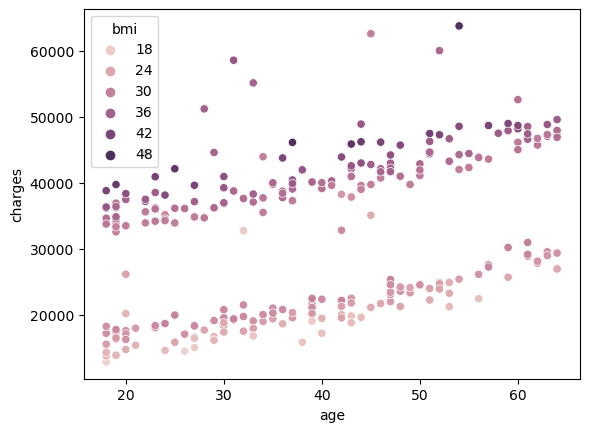

In [12]:
sns.scatterplot(x='age', y='charges', data=df2, hue = 'bmi')
plt.show()

7. Filter dataframe further by smoker with `bmi` < 30 and assign to dataframe `df3`.  Filter dataframe by smoker with `bmi` > 30 and assign to dataframe `df4`.

In [15]:
df3 = df2.loc[df2.bmi < 30]
df4 = df2.loc[df2.bmi > 30]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
52,48,male,28.00,1,yes,southwest,23568.2720
58,53,female,22.88,1,yes,southeast,23244.7902
64,20,female,22.42,0,yes,northwest,14711.7438


8. Get scatter plots of `charges` vs `age` for `df3` and `df4` in a single plot.

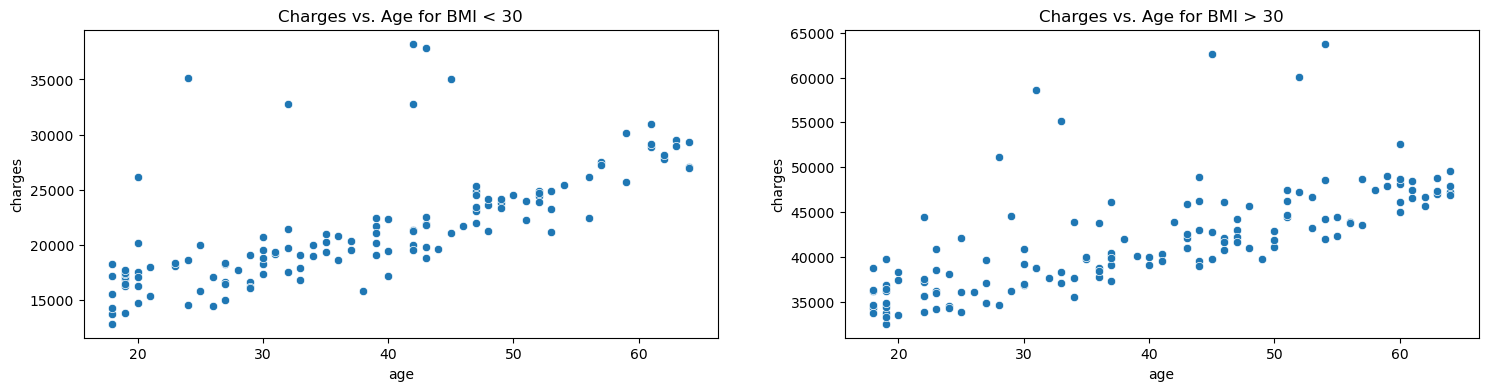

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.scatterplot(x='age', y ='charges', data=df3, ax = axes[0])
axes[0].set_title("Charges vs. Age for BMI < 30")
sns.scatterplot(x='age', y='charges', data=df4, ax = axes[1])
axes[1].set_title("Charges vs. Age for BMI > 30")
plt.show()

9. Perform linear regression model of `charges` vs `age` for `df3`.  Graph the model over the scatter plot of the data.  Evaluate the `score` for the model.

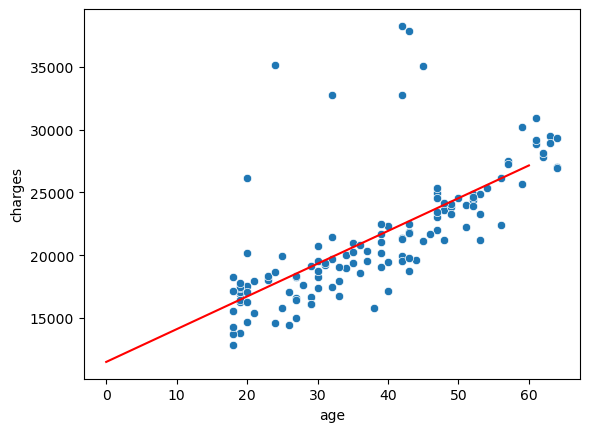

0.48181414037841475


In [26]:
x = np.array(df3['age']).reshape(-1,1)
y = np.array(df3['charges']).reshape(-1,1)
model = LinearRegression().fit(x, y)
x_pred = np.linspace(0, 60, num=20).reshape((-1,1))
y_pred = model.predict(x_pred)
sns.scatterplot(x='age', y ='charges', data=df3)
plt.plot(x_pred, y_pred, color="red")
plt.show()
print(model.score(x,y))

10. Perform linear regression model of `charges` vs `age` for `df4`.  Graph the model over the scatter plot of the data.  Evaluate the `score` for the model.

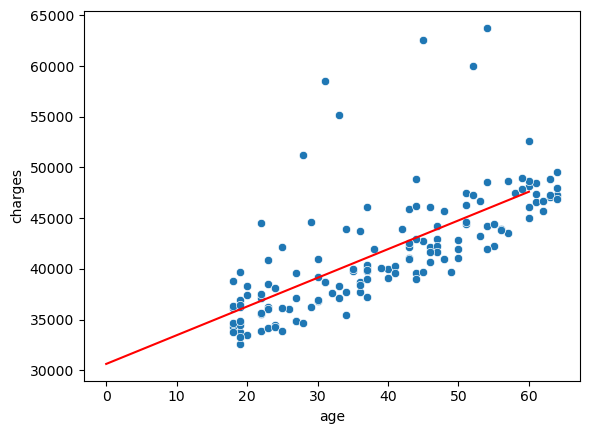

0.48660343990862887


In [25]:
x = np.array(df4['age']).reshape(-1,1)
y = np.array(df4['charges']).reshape(-1,1)
model = LinearRegression().fit(x, y)
x_pred = np.linspace(0,60,num=20).reshape(-1,1)
y_pred = model.predict(x_pred)
sns.scatterplot(x='age', y='charges', data=df4)
plt.plot(x_pred,y_pred, color="red")
plt.show()
print(model.score(x,y))

### Extra credit: redo (4) using `statsmodels`

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     691.4
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          9.17e-118
Time:                        16:33:42   Log-Likelihood:                -10498.
No. Observations:                1064   AIC:                         2.100e+04
Df Residuals:                    1062   BIC:                         2.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2091.4206    425.102     -4.920      0.0

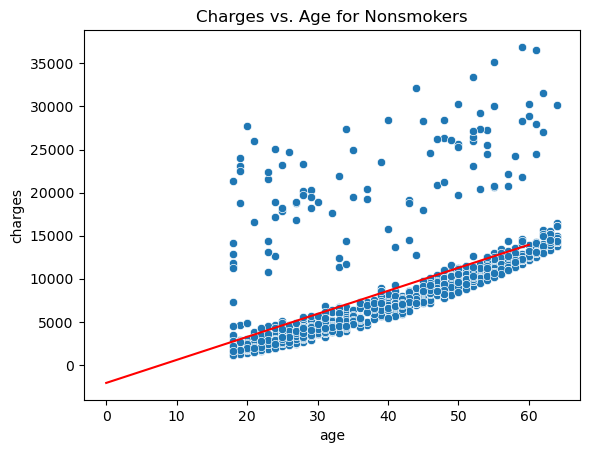

In [30]:
#Extra credit
X = sm.add_constant(df1['age'])
y = df1['charges']
model = sm.OLS(y, X).fit()
print(model.summary())
sns.scatterplot(x='age', y='charges', data=df1)
plt.title("Charges vs. Age for Nonsmokers")
x_pred = np.linspace(0, 60, num=20)
x_pred = sm.add_constant(x_pred)
y_pred = model.predict(x_pred)
plt.plot(x_pred[:, 1], y_pred, color="red")
plt.show()
#Note that our model summary shows us that the model score (aka R^2) is 0.394, which is equivalent to 
#what we got in 4!